## Classifying news-wires a multiclass classification:
This problem is a instance of multiclass classification
because each data point should be classified into one category ,
the problem is more specifically an instance of single label multiclass
classification.

### Reuters dataset


In [51]:
from tensorflow.keras.datasets import reuters
(train_data,train_labels) , (test_data, test_labels) = reuters.load_data(
    num_words=10000
)

print(len(train_data))
print(len(test_data))

8982
2246


/home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:143: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/mgrdich/.local/share/virtualenvs/deep_learning_python-pzRhtxR0/lib/python3.8/site-packages/tensorflow/python/keras/datasets/reuters.py:144: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


### Decoding news-wires back to text



In [52]:
word_index = reuters.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}
decoded_newswire = ''.join([
    reverse_word_index.get(i-3,'?') for i in train_data[0]
])
print(decoded_newswire)

???saidasaresultofitsdecemberacquisitionofspacecoitexpectsearningspersharein1987of115to130dlrspershareupfrom70ctsin1986thecompanysaidpretaxnetshouldrisetonineto10mlndlrsfromsixmlndlrsin1986andrentaloperationrevenuesto19to22mlndlrsfrom125mlndlrsitsaidcashflowpersharethisyearshouldbe250tothreedlrsreuter3


the label associated with an example is an integer between `0-45` topic index

In [53]:
train_labels[0]
print(reverse_word_index[train_labels[0]])
# probably not decoded this way


to


In [54]:
# vectorized
from util.functions import vectorize_sequences
x_train = vectorize_sequences(train_data,10000)
x_test = vectorize_sequences(test_data,10000)

# OR categorical encoding
from tensorflow.keras.utils import to_categorical
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)


### Building your Network
But there is a new constraint here: the number of output classes has gone from 2 to 46. The
dimensionality of the output space is much larger.

In Stack of `Dense` Layers like you've been using each layer can only access information
present in the output the previous layer

In [55]:
from tensorflow.keras import models , layers
model = models.Sequential()
model.add(layers.Dense(64,activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

There are two things two know about this architecture
* You end the network with a dense layer of size 46. Each entry in this vec-
tor (each dimension) will encode a different output class.
* The last layer uses `softmax` activation , the network will output
`probability Distribution` over `46` different output classes
`output[i]` is the probability that the sample belongs to class `i`. The scores
`46` will sum to `1`.

`categorical_crossentropy` . It measures the distance between two probability distributions

In [56]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

### Validating you approach


In [57]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [58]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val,y_val)
)

Epoch 1/20
16/16 [==============================] - 1s 26ms/step - loss: 2.5716 - accuracy: 0.5286 - val_loss: 1.6798 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 0s 17ms/step - loss: 1.3834 - accuracy: 0.7096 - val_loss: 1.2852 - val_accuracy: 0.7050
Epoch 3/20
16/16 [==============================] - 0s 17ms/step - loss: 1.0345 - accuracy: 0.7777 - val_loss: 1.1207 - val_accuracy: 0.7680

### let's display the loss accuracy


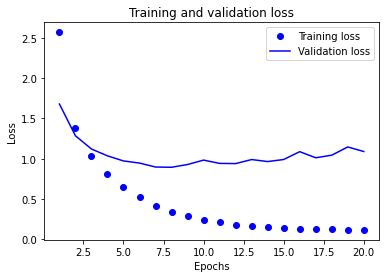

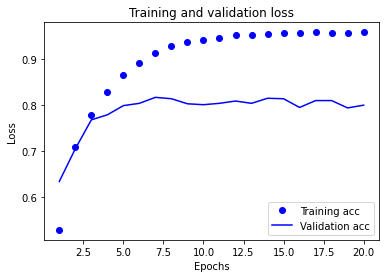

In [59]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss)+1)

plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf() # clears the figure


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The network begins to overfit after nine epochs.
#### Let's train a new network from scratch for nine epochs and then evaluate it

In [60]:
# Retraining a model from scratch
model = models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(46,activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

print(results)


Epoch 1/9
16/16 [==============================] - 1s 26ms/step - loss: 2.7771 - accuracy: 0.5145 - val_loss: 1.8110 - val_accuracy: 0.6480
Epoch 2/9
16/16 [==============================] - 0s 17ms/step - loss: 1.4912 - accuracy: 0.7033 - val_loss: 1.3708 - val_accuracy: 0.6950
Epoch 3/9
16/16 [==============================] - 0s 17ms/step - loss: 1.1126 - accuracy: 0.7602 - val_loss: 1.1946 - val_accuracy: 0.7430

This approach reaches an accuracy of 80% approximately , with binary classification
problem the accuracy reached by a purely random classifier would be 50%
but in this case is closer to 19%

In [61]:
import copy
import numpy as np
test_labels_copy = copy.copy(test_labels)
print(np.random.shuffle(test_labels_copy))
#TODO ask this part
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(float(np.sum(hits_array)/len(test_labels)))

None
0.188780053428317


## Getting prediction on the new data


In [62]:
predictions = model.predict(x_test)
print(predictions[0].shape)

# the coefficients in this vector is 1:
print(np.sum(predictions[0]))

# he largest entry is the predicted class—the class with the highest probability:

print(np.argmax(predictions[0]))

(46,)
1.0
3


### Different way of handling labels and loss ??

### The importance of having sufficiently large intermediate layers
the final outputs are 46-dimensional, you should
avoid intermediate layers with many fewer than 46 hidden units



In [63]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
            partial_y_train,
            epochs=20,
            batch_size=128,
            validation_data=(x_val, y_val)
          )
results = model.evaluate(x_test, one_hot_test_labels)

print(results)

Epoch 1/20
63/63 [==============================] - 1s 9ms/step - loss: 1.7220 - accuracy: 0.6361 - val_loss: 1.2213 - val_accuracy: 0.7360
Epoch 2/20
63/63 [==============================] - 0s 8ms/step - loss: 0.9204 - accuracy: 0.7965 - val_loss: 0.9751 - val_accuracy: 0.7970

The network now peaks at ~71% validation accuracy, an 8% absolute drop. This drop
is mostly due to the fact that you’re trying to compress a lot of information (enough
information to recover the separation hyperplanes of 46 classes) into an intermediate
space that is too low-dimensional. The network is able to cram most of the necessary
information into these eight-dimensional representations, but not all of it.

## Prediction house prices : a regression example
This consists of predicting a **continuous**
value instead of a discrete label: for instance, predicting the temperature tomorrow,
given meteorological data; or predicting the time that a software project will take to
complete, given its specifications.

In [64]:
from tensorflow.keras.datasets import boston_housing
(btrain_data,btrain_targets),(btest_data, btest_targets) = boston_housing.load_data()
print(btrain_data.shape)
print(btest_data.shape)

# The targets are the median values of owner-occupied homes, in thousands of dollars:
print(btrain_targets)

(404, 13)
(102, 13)
[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 

It would be problematic to feed into a neural network values that all take wildly differ-ent ranges
A practice **normalization** for each feature in the input data (column in the input data matrix)
You divide by the mean of the feature than divide by the standard deviation
So it is centered around 0 and has a unit standard deviation

In [65]:
b_mean = btrain_data.mean(axis=0)
btrain_data -= b_mean
b_std = btrain_data.std(axis=0)

btrain_data /= b_std

btest_data -= b_mean
btest_data /= b_std

**normalizing the test data are computed using the training data no any result
from the test data should be computed**

## Building your Network

In [65]:
def build_model():
    # mse -> mean squared method
    my_model = models.Sequential()
    my_model.add(layers.Dense(64,activation='relu',input_shape=(btrain_data.shape[1],)))
    my_model.add(layers.Dense(64,activation='relu'))
    my_model.add(layers.Dense(1))
    my_model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return my_model


## Validation with K-fold approach
since we have few data validation set is very small
SO
validation score might change depending on which data you choose the validation
scores might have a high variance with regard to the validation split. This would pre-
vent you from reliably evaluating your model.

### K-fold cross validation
* split data into `K` partitions typically (`K = 4` or `K = 5`)
* instantiating `K` identical models
* training each one on K – 1 partitions while evaluating on the remaining partition